<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** _Ojesh Agrawal_

**Student ID:** _s222484981_

<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations


**Aim:** To clearly articulate your understanding of the bussiness problem to management.

_Use this section to briefly include the business understandings and the business problem to address, the aim of this project and recommendations for VicCrashAnalytics.

<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation


In [ ]:
# Loading the (lib) required libraries
#for data manipulation
import pandas as pd
#for arrays
import numpy as np
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the classifier which is decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # testing and split function
from sklearn import metrics #for evaluation of the model
from sklearn.metrics import precision_recall_curve, precision_recall_curve, classification_report
from sklearn.metrics import classification_report, confusion_matrix

# Load data from CloudDeakin (Drive)
from google.colab import drive
drive.mount('/content/drive')

# loading dataset any name can be used, here I am using recods.
records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/A1/Blackspot.csv")

#looking at dataset
print(records)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        ID               EZI_ROAD_NAME              ROAD_NAME ROAD_TYPE  \
0     3699                  GROVE ROAD                  GROVE      ROAD   
1      576          BACCHUS MARSH ROAD          BACCHUS MARSH      ROAD   
2      758                GRUBBED ROAD                GRUBBED      ROAD   
3       89                VIGOR STREET                  VIGOR    STREET   
4     8773                FAIRMAN ROAD                FAIRMAN      ROAD   
...    ...                         ...                    ...       ...   
5321   256  WARBURTON-WOODS POINT ROAD  WARBURTON-WOODS POINT      ROAD   
5322  5182             GLENELG HIGHWAY                GLENELG   HIGHWAY   
5323  4196          CAPE PATERSON ROAD          CAPE PATERSON      ROAD   
5324  4352                MCPHANS ROAD                MCPHANS      ROAD   
5325   223                 ROGERS ROAD        

In [ ]:
#dimesions of dataset
records.shape

(5326, 36)

In [ ]:
#knowing more about the missing values
print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5317 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

In [ ]:
records.head(5)

,ID,EZI_ROAD_NAME,ROAD_NAME,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
0,3699,GROVE ROAD,GROVE,ROAD,0.121988,0.058735,0.228916,0.269578,0.853916,0.320783,...,0.358321,0.0,14.0,non-Intersection,0,0,0,0,0,Blackspot
1,576,BACCHUS MARSH ROAD,BACCHUS MARSH,ROAD,0.215894,0.141722,0.312583,0.201325,0.741722,0.128477,...,0.000000,1.0,0.0,Intersection,0,0,0,1,0,Blackspot
2,758,GRUBBED ROAD,GRUBBED,ROAD,0.185304,0.102236,0.194888,0.348243,0.757188,0.169329,...,1.000000,0.0,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
3,89,VIGOR STREET,VIGOR,STREET,0.167763,0.062500,0.286184,0.322368,0.815789,0.161184,...,0.036599,0.0,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
4,8773,FAIRMAN ROAD,FAIRMAN,ROAD,0.201238,0.108359,0.204334,0.340557,0.761610,0.145511,...,0.000000,1.0,0.0,non-Intersection,0,0,0,0,0,non-Blackspot


In [ ]:
records.tail(5)

,ID,EZI_ROAD_NAME,ROAD_NAME,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
5321,256,WARBURTON-WOODS POINT ROAD,WARBURTON-WOODS POINT,ROAD,0.152047,0.087719,0.198830,0.385965,0.812865,0.175439,...,1.0,0.000000,0.0,non-Intersection,0,0,0,1,0,non-Blackspot
5322,5182,GLENELG HIGHWAY,GLENELG,HIGHWAY,0.142119,0.090439,0.209302,0.328165,0.816537,0.229974,...,0.0,0.155542,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
5323,4196,CAPE PATERSON ROAD,CAPE PATERSON,ROAD,0.163701,0.106762,0.170819,0.352313,0.779359,0.206406,...,0.0,1.000000,0.0,non-Intersection,0,0,0,1,0,non-Blackspot
5324,4352,MCPHANS ROAD,MCPHANS,ROAD,0.155039,0.173127,0.129199,0.310078,0.806202,0.232558,...,0.0,1.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
5325,223,ROGERS ROAD,ROGERS,ROAD,0.197647,0.129412,0.200000,0.301176,0.764706,0.171765,...,0.0,1.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot


In [ ]:
print(records.isnull().sum())

ID                                 0
EZI_ROAD_NAME                      0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
AGE_18YRS_OVER_PCNT                0
AGE_65YRS_OVER_PCNT                9
SEO_PERSONS_PCNT                   0
FC_COUPLE_NO_CHILDREN_PCNT         0
FC_COUPLE_WITH_CHILDREN_PCNT       0
FC_SINGLE_PARENT                   0
CARS_ZERO_HH_PCNT                  0
CARS_ONE_HH_PCNT                   0
CARS_TWO_OR_MORE_HH_PCNT           0
DWELLING_SEP_HOUSE_PCNT            0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
DWELLING_FLAT_UNIT_APART_PCNT      0
OCCUPATION_WHITE_COLLAR_PCNT       0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
P

In [ ]:
#here Lq_Licenses and AGE_65YRS_OVER_PCNT is found to have some missing values

In [ ]:
#looking into stats of the dataset given to us specially numeric features
records.describe()

,ID,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,SEO_PERSONS_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,...,Industrial%,Residential%,Parkland%,Primary_Production%,Lq_Licenses,Supermarket,primary_school,secondary_school,km_post,traffic_signal
count,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,...,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000,5326.000000
mean,4996.381149,0.175456,0.099507,0.202988,0.306965,0.774056,0.202530,0.884964,0.443514,0.401426,...,0.009862,0.393237,0.137413,0.375253,0.378008,0.012580,0.025535,0.004506,0.127488,0.022343
std,2885.736141,0.050574,0.030945,0.054621,0.067690,0.102008,0.105128,0.107473,0.105680,0.114858,...,0.070263,0.413405,0.277777,0.431760,1.550092,0.111462,0.157758,0.066983,0.333550,0.147811
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2477.000000,0.144847,0.079897,0.172337,0.274064,0.751515,0.149367,0.870588,0.387283,0.342105,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5020.500000,0.177419,0.102041,0.197248,0.317073,0.778723,0.181102,0.896985,0.450000,0.406977,...,0.000000,0.226550,0.000000,0.081297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7478.750000,0.205817,0.123007,0.234266,0.348189,0.816156,0.237288,0.927536,0.500000,0.477124,...,0.000000,0.832911,0.114782,0.962690,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9999.000000,0.329241,0.198113,0.608696,0.490798,1.000000,1.000000,1.000000,1.088235,0.785714,...,1.000000,1.000000,1.000000,1.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#To Filling in the missing data using mean because it is numerical type if it were to be categorical we would have used mode
records['AGE_65YRS_OVER_PCNT'].fillna(records['AGE_65YRS_OVER_PCNT'].mean(),inplace=True)
records['Lq_Licenses'].fillna(records['Lq_Licenses'].mean(),inplace=True)

In [ ]:
#getting the output after substitution of the values
print(records.isnull().sum())

ID                                 0
EZI_ROAD_NAME                      0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
AGE_18YRS_OVER_PCNT                0
AGE_65YRS_OVER_PCNT                0
SEO_PERSONS_PCNT                   0
FC_COUPLE_NO_CHILDREN_PCNT         0
FC_COUPLE_WITH_CHILDREN_PCNT       0
FC_SINGLE_PARENT                   0
CARS_ZERO_HH_PCNT                  0
CARS_ONE_HH_PCNT                   0
CARS_TWO_OR_MORE_HH_PCNT           0
DWELLING_SEP_HOUSE_PCNT            0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
DWELLING_FLAT_UNIT_APART_PCNT      0
OCCUPATION_WHITE_COLLAR_PCNT       0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
P

In [ ]:
#exploring the variables, Road type feature has 6 categories
records.ROAD_TYPE.value_counts()

ROAD       3400
STREET     1324
DRIVE       295
HIGHWAY     180
WAY          77
FREEWAY      50
Name: ROAD_TYPE, dtype: int64

In [ ]:
#intersection feature has 2 categories
records.Intersection.value_counts()

non-Intersection    4659
Intersection         667
Name: Intersection, dtype: int64

<Axes: xlabel='ROAD_TYPE', ylabel='count'>

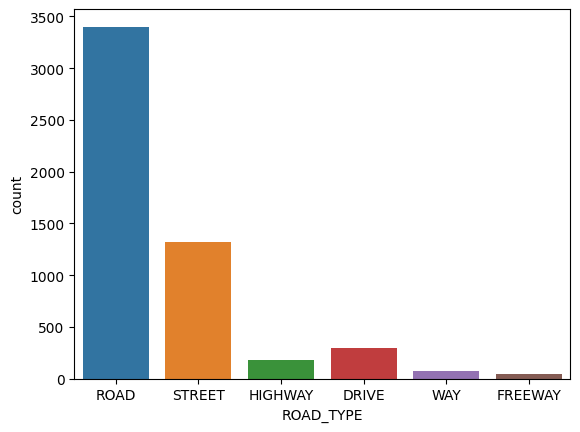

In [ ]:
#Visual representation of the categorical variable/ feature, here (ROAD_TYPE)
sns.countplot(x=records['ROAD_TYPE'])

<Axes: xlabel='Intersection', ylabel='count'>

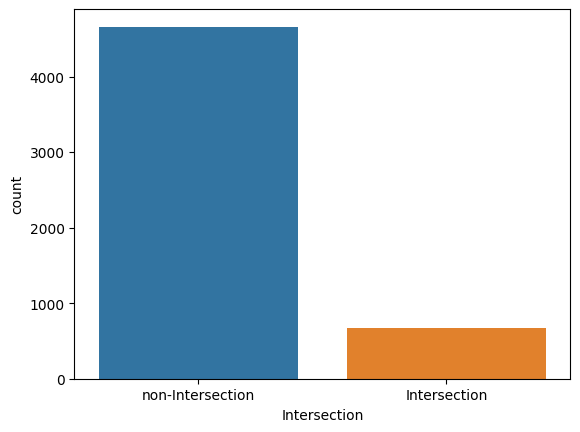

In [ ]:
#Graphical representation whether intersection present or not. (Histogram)
sns.countplot(x=records['Intersection'])

<Axes: xlabel='Supermarket', ylabel='count'>

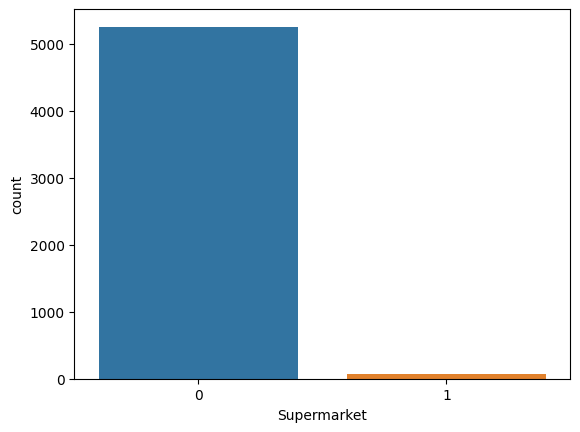

In [ ]:
sns.countplot(x=records['Supermarket'])

<Axes: xlabel='primary_school', ylabel='count'>

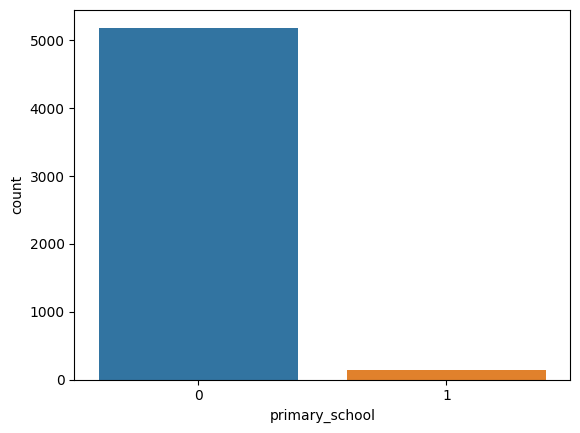

In [ ]:
sns.countplot(x=records['primary_school'])

<Axes: xlabel='secondary_school', ylabel='count'>

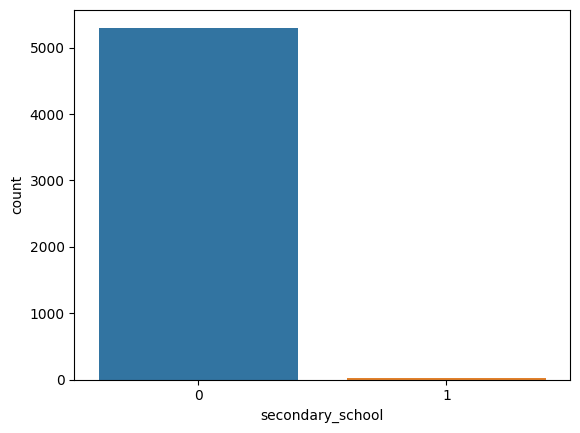

In [ ]:
sns.countplot(x=records['secondary_school'])

<Axes: xlabel='km_post', ylabel='count'>

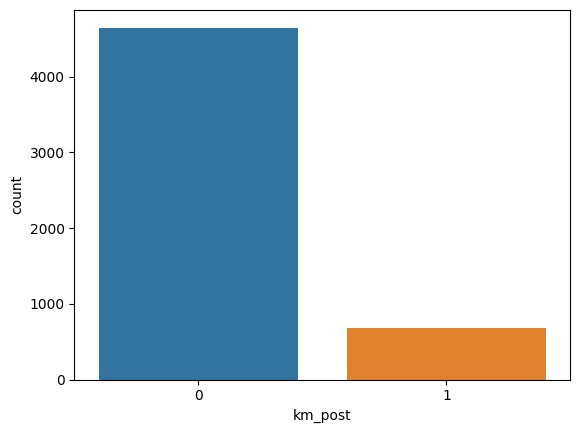

In [ ]:
sns.countplot(x=records['km_post'])

<Axes: xlabel='traffic_signal', ylabel='count'>

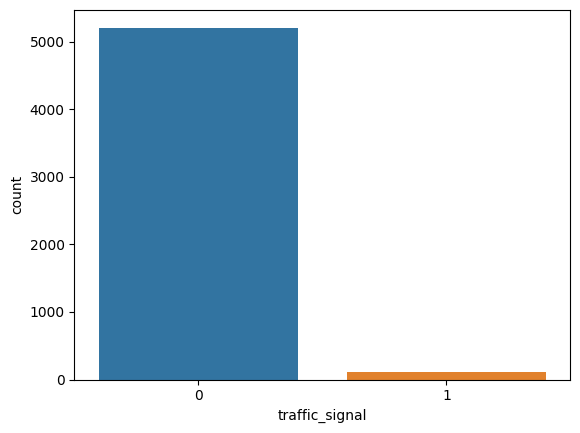

In [ ]:
sns.countplot(x=records['traffic_signal'])

<Axes: xlabel='Blackspot', ylabel='count'>

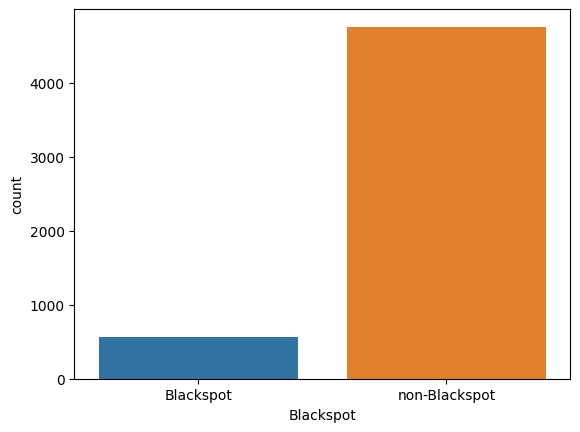

In [ ]:
sns.countplot(x=records['Blackspot'])

<Axes: xlabel='ROAD_TYPE', ylabel='count'>

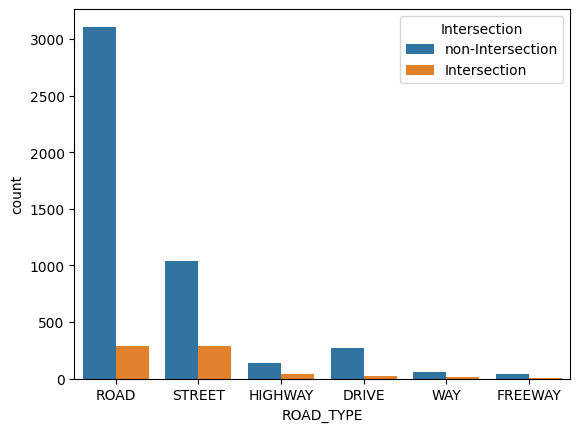

In [ ]:
#Graphically comparing two variables (here, Intersection and ROAD_TYPE)
sns.countplot(data=records, x='ROAD_TYPE', hue='Intersection')

In [ ]:
records=records.drop(['ID','EZI_ROAD_NAME','ROAD_NAME','AGE_18YRS_OVER_PCNT', 'SEIFA', 'SEO_PERSONS_PCNT', 'OCCUPATION_WHITE_COLLAR_PCNT', 'OCCUPATION_BLUE_COLLAR_PCNT', 'CARS_ZERO_HH_PCNT'], axis=1)

<ipython-input-40-de75da5e869c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(records.corr(), square=True, cmap='Blues', annot=True)


<Axes: >

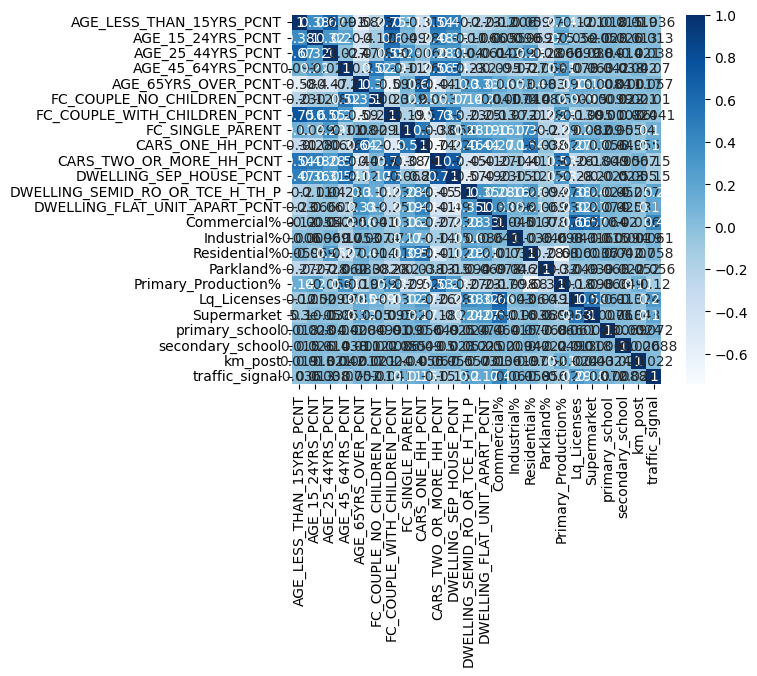

In [ ]:
sns.heatmap(records.corr(), square=True, cmap='Blues', annot=True)

In [ ]:
records

,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_65YRS_OVER_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,FC_SINGLE_PARENT,CARS_ONE_HH_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
0,ROAD,0.121988,0.058735,0.228916,0.269578,0.320783,0.575758,0.303030,0.075758,0.429224,...,0.358321,0.000000,14.0,non-Intersection,0,0,0,0,0,Blackspot
1,ROAD,0.215894,0.141722,0.312583,0.201325,0.128477,0.401869,0.518692,0.126168,0.225191,...,0.000000,1.000000,0.0,Intersection,0,0,0,1,0,Blackspot
2,ROAD,0.185304,0.102236,0.194888,0.348243,0.169329,0.505155,0.360825,0.103093,0.177570,...,1.000000,0.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
3,STREET,0.167763,0.062500,0.286184,0.322368,0.161184,0.454545,0.363636,0.227273,0.372727,...,0.036599,0.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
4,ROAD,0.201238,0.108359,0.204334,0.340557,0.145511,0.431579,0.484211,0.052632,0.115385,...,0.000000,1.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,ROAD,0.152047,0.087719,0.198830,0.385965,0.175439,0.413043,0.304348,0.173913,0.342105,...,1.000000,0.000000,0.0,non-Intersection,0,0,0,1,0,non-Blackspot
5322,HIGHWAY,0.142119,0.090439,0.209302,0.328165,0.229974,0.482456,0.254386,0.149123,0.307692,...,0.000000,0.155542,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
5323,ROAD,0.163701,0.106762,0.170819,0.352313,0.206406,0.443038,0.405063,0.101266,0.106383,...,0.000000,1.000000,0.0,non-Intersection,0,0,0,1,0,non-Blackspot
5324,ROAD,0.155039,0.173127,0.129199,0.310078,0.232558,0.468750,0.354167,0.125000,0.203252,...,0.000000,1.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['AGE_LESS_THAN_15YRS_PCNT'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['AGE_15_24YRS_PCNT'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['AGE_25_44YRS_PCNT'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['AGE_LESS_THAN_15YRS_PCNT'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['AGE_15_24YRS_PCNT'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['AGE_25_44YRS_PCNT'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['ROAD_TYPE'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_9, *[[['index', 'AGE_LESS_THAN_15YRS_PCNT'], ['AGE_LESS_THAN_15YRS_PCNT', 'AGE_15_24YRS_PCNT'], ['AGE_15_24YRS_PCNT', 'AGE_25_44YRS_PCNT'], ['AGE_25_44YRS_PCNT', 'AGE_45_64YRS_PCNT']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_10, *['index', 'ROAD_TYPE'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_11, *['AGE_LESS_THAN_15YRS_PCNT', 'ROAD_TYPE'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['AGE_15_24YRS_PCNT', 'ROAD_TYPE'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['AGE_25_44YRS_PCNT', 'ROAD_TYPE'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_14, *['index', 'AGE_LESS_THAN_15YRS_PCNT', 'ROAD_TYPE'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_15, *['index', 'AGE_15_24YRS_PCNT', 'ROAD_TYPE'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_16, *['index', 'AGE_25_44YRS_PCNT', 'ROAD_TYPE'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['index', 'AGE_45_64YRS_PCNT', 'ROAD_TYPE'], **{})
chart

In [ ]:
records

,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_65YRS_OVER_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,FC_SINGLE_PARENT,CARS_ONE_HH_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
0,ROAD,0.121988,0.058735,0.228916,0.269578,0.320783,0.575758,0.303030,0.075758,0.429224,...,0.358321,0.000000,14.0,non-Intersection,0,0,0,0,0,Blackspot
1,ROAD,0.215894,0.141722,0.312583,0.201325,0.128477,0.401869,0.518692,0.126168,0.225191,...,0.000000,1.000000,0.0,Intersection,0,0,0,1,0,Blackspot
2,ROAD,0.185304,0.102236,0.194888,0.348243,0.169329,0.505155,0.360825,0.103093,0.177570,...,1.000000,0.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
3,STREET,0.167763,0.062500,0.286184,0.322368,0.161184,0.454545,0.363636,0.227273,0.372727,...,0.036599,0.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
4,ROAD,0.201238,0.108359,0.204334,0.340557,0.145511,0.431579,0.484211,0.052632,0.115385,...,0.000000,1.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,ROAD,0.152047,0.087719,0.198830,0.385965,0.175439,0.413043,0.304348,0.173913,0.342105,...,1.000000,0.000000,0.0,non-Intersection,0,0,0,1,0,non-Blackspot
5322,HIGHWAY,0.142119,0.090439,0.209302,0.328165,0.229974,0.482456,0.254386,0.149123,0.307692,...,0.000000,0.155542,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
5323,ROAD,0.163701,0.106762,0.170819,0.352313,0.206406,0.443038,0.405063,0.101266,0.106383,...,0.000000,1.000000,0.0,non-Intersection,0,0,0,1,0,non-Blackspot
5324,ROAD,0.155039,0.173127,0.129199,0.310078,0.232558,0.468750,0.354167,0.125000,0.203252,...,0.000000,1.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot


In [ ]:
# we have to here convert categorical to numerical variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
records['ROAD_TYPE'] = encoder.fit_transform(records['ROAD_TYPE'])

In [ ]:
records

,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_65YRS_OVER_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,FC_SINGLE_PARENT,CARS_ONE_HH_PCNT,...,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot,ROAD_TYPE_N
0,3,0.121988,0.058735,0.228916,0.269578,0.320783,0.575758,0.303030,0.075758,0.429224,...,0.000000,14.0,non-Intersection,0,0,0,0,0,Blackspot,3
1,3,0.215894,0.141722,0.312583,0.201325,0.128477,0.401869,0.518692,0.126168,0.225191,...,1.000000,0.0,Intersection,0,0,0,1,0,Blackspot,3
2,3,0.185304,0.102236,0.194888,0.348243,0.169329,0.505155,0.360825,0.103093,0.177570,...,0.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot,3
3,4,0.167763,0.062500,0.286184,0.322368,0.161184,0.454545,0.363636,0.227273,0.372727,...,0.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot,4
4,3,0.201238,0.108359,0.204334,0.340557,0.145511,0.431579,0.484211,0.052632,0.115385,...,1.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,3,0.152047,0.087719,0.198830,0.385965,0.175439,0.413043,0.304348,0.173913,0.342105,...,0.000000,0.0,non-Intersection,0,0,0,1,0,non-Blackspot,3
5322,2,0.142119,0.090439,0.209302,0.328165,0.229974,0.482456,0.254386,0.149123,0.307692,...,0.155542,0.0,non-Intersection,0,0,0,0,0,non-Blackspot,2
5323,3,0.163701,0.106762,0.170819,0.352313,0.206406,0.443038,0.405063,0.101266,0.106383,...,1.000000,0.0,non-Intersection,0,0,0,1,0,non-Blackspot,3
5324,3,0.155039,0.173127,0.129199,0.310078,0.232558,0.468750,0.354167,0.125000,0.203252,...,1.000000,0.0,non-Intersection,0,0,0,0,0,non-Blackspot,3


In [ ]:
# we have to here convert categorical to numerical variables
records['Intersection'] = encoder.fit_transform(records['Intersection'])

In [ ]:
records

,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_65YRS_OVER_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,FC_SINGLE_PARENT,CARS_ONE_HH_PCNT,...,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot,ROAD_TYPE_N
0,3,0.121988,0.058735,0.228916,0.269578,0.320783,0.575758,0.303030,0.075758,0.429224,...,0.000000,14.0,1,0,0,0,0,0,Blackspot,3
1,3,0.215894,0.141722,0.312583,0.201325,0.128477,0.401869,0.518692,0.126168,0.225191,...,1.000000,0.0,0,0,0,0,1,0,Blackspot,3
2,3,0.185304,0.102236,0.194888,0.348243,0.169329,0.505155,0.360825,0.103093,0.177570,...,0.000000,0.0,1,0,0,0,0,0,non-Blackspot,3
3,4,0.167763,0.062500,0.286184,0.322368,0.161184,0.454545,0.363636,0.227273,0.372727,...,0.000000,0.0,1,0,0,0,0,0,non-Blackspot,4
4,3,0.201238,0.108359,0.204334,0.340557,0.145511,0.431579,0.484211,0.052632,0.115385,...,1.000000,0.0,1,0,0,0,0,0,non-Blackspot,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,3,0.152047,0.087719,0.198830,0.385965,0.175439,0.413043,0.304348,0.173913,0.342105,...,0.000000,0.0,1,0,0,0,1,0,non-Blackspot,3
5322,2,0.142119,0.090439,0.209302,0.328165,0.229974,0.482456,0.254386,0.149123,0.307692,...,0.155542,0.0,1,0,0,0,0,0,non-Blackspot,2
5323,3,0.163701,0.106762,0.170819,0.352313,0.206406,0.443038,0.405063,0.101266,0.106383,...,1.000000,0.0,1,0,0,0,1,0,non-Blackspot,3
5324,3,0.155039,0.173127,0.129199,0.310078,0.232558,0.468750,0.354167,0.125000,0.203252,...,1.000000,0.0,1,0,0,0,0,0,non-Blackspot,3


In [ ]:
#converting categorical to numerical the label attribute/ feature/ variable

def  coding_diagnosis(x):
    if x=='non-Blackspot' : return 1
    if x=='Blackspot' : return 0

records['BLACKSPOTS'] = records['Blackspot'].apply(coding_diagnosis)

print(records.sample(5))


        ID        EZI_ROAD_NAME       ROAD_NAME  ROAD_TYPE  \
4414  1730      WITCOMBE STREET        WITCOMBE          4   
2071  7993  COLAC-BALLARAT ROAD  COLAC-BALLARAT          3   
3195  8140       WILTSHIRE ROAD       WILTSHIRE          3   
1612   491          MAIN STREET            MAIN          4   
3661  2589         SPLATTS ROAD         SPLATTS          3   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
4414                  0.144804           0.097104           0.207836   
2071                  0.177419           0.168459           0.197133   
3195                  0.134375           0.128125           0.193750   
1612                  0.100244           0.070905           0.161369   
3661                  0.182320           0.069061           0.226519   

      AGE_45_64YRS_PCNT  AGE_18YRS_OVER_PCNT  AGE_65YRS_OVER_PCNT  ...  \
4414           0.339012             0.833049             0.211244  ...   
2071           0.295699             0.765233  

In [ ]:
records

,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_65YRS_OVER_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,FC_SINGLE_PARENT,CARS_ONE_HH_PCNT,...,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot,ROAD_TYPE_N,BLACKSPOTS
0,3,0.121988,0.058735,0.228916,0.269578,0.320783,0.575758,0.303030,0.075758,0.429224,...,14.0,1,0,0,0,0,0,Blackspot,3,0
1,3,0.215894,0.141722,0.312583,0.201325,0.128477,0.401869,0.518692,0.126168,0.225191,...,0.0,0,0,0,0,1,0,Blackspot,3,0
2,3,0.185304,0.102236,0.194888,0.348243,0.169329,0.505155,0.360825,0.103093,0.177570,...,0.0,1,0,0,0,0,0,non-Blackspot,3,1
3,4,0.167763,0.062500,0.286184,0.322368,0.161184,0.454545,0.363636,0.227273,0.372727,...,0.0,1,0,0,0,0,0,non-Blackspot,4,1
4,3,0.201238,0.108359,0.204334,0.340557,0.145511,0.431579,0.484211,0.052632,0.115385,...,0.0,1,0,0,0,0,0,non-Blackspot,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,3,0.152047,0.087719,0.198830,0.385965,0.175439,0.413043,0.304348,0.173913,0.342105,...,0.0,1,0,0,0,1,0,non-Blackspot,3,1
5322,2,0.142119,0.090439,0.209302,0.328165,0.229974,0.482456,0.254386,0.149123,0.307692,...,0.0,1,0,0,0,0,0,non-Blackspot,2,1
5323,3,0.163701,0.106762,0.170819,0.352313,0.206406,0.443038,0.405063,0.101266,0.106383,...,0.0,1,0,0,0,1,0,non-Blackspot,3,1
5324,3,0.155039,0.173127,0.129199,0.310078,0.232558,0.468750,0.354167,0.125000,0.203252,...,0.0,1,0,0,0,0,0,non-Blackspot,3,1


In [ ]:
records=records.drop(['Blackspot', 'ROAD_TYPE_N'], axis=1)

In [ ]:
records


,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_65YRS_OVER_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,FC_SINGLE_PARENT,CARS_ONE_HH_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,BLACKSPOTS
0,3,0.121988,0.058735,0.228916,0.269578,0.320783,0.575758,0.303030,0.075758,0.429224,...,0.358321,0.000000,14.0,1,0,0,0,0,0,0
1,3,0.215894,0.141722,0.312583,0.201325,0.128477,0.401869,0.518692,0.126168,0.225191,...,0.000000,1.000000,0.0,0,0,0,0,1,0,0
2,3,0.185304,0.102236,0.194888,0.348243,0.169329,0.505155,0.360825,0.103093,0.177570,...,1.000000,0.000000,0.0,1,0,0,0,0,0,1
3,4,0.167763,0.062500,0.286184,0.322368,0.161184,0.454545,0.363636,0.227273,0.372727,...,0.036599,0.000000,0.0,1,0,0,0,0,0,1
4,3,0.201238,0.108359,0.204334,0.340557,0.145511,0.431579,0.484211,0.052632,0.115385,...,0.000000,1.000000,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5321,3,0.152047,0.087719,0.198830,0.385965,0.175439,0.413043,0.304348,0.173913,0.342105,...,1.000000,0.000000,0.0,1,0,0,0,1,0,1
5322,2,0.142119,0.090439,0.209302,0.328165,0.229974,0.482456,0.254386,0.149123,0.307692,...,0.000000,0.155542,0.0,1,0,0,0,0,0,1
5323,3,0.163701,0.106762,0.170819,0.352313,0.206406,0.443038,0.405063,0.101266,0.106383,...,0.000000,1.000000,0.0,1,0,0,0,1,0,1
5324,3,0.155039,0.173127,0.129199,0.310078,0.232558,0.468750,0.354167,0.125000,0.203252,...,0.000000,1.000000,0.0,1,0,0,0,0,0,1


In [ ]:
#Predictors for our ML model
features = ['ROAD_TYPE', 'AGE_LESS_THAN_15YRS_PCNT', 'AGE_15_24YRS_PCNT', 'AGE_25_44YRS_PCNT', 'AGE_45_64YRS_PCNT', 'AGE_65YRS_OVER_PCNT', 'FC_COUPLE_NO_CHILDREN_PCNT', 'Intersection','traffic_signal','km_post','secondary_school','primary_school','Supermarket','Primary_Production%','Parkland%','Residential%','Industrial%','Commercial%','DWELLING_FLAT_UNIT_APART_PCNT','DWELLING_SEMID_RO_OR_TCE_H_TH_P','DWELLING_SEP_HOUSE_PCNT','FC_COUPLE_WITH_CHILDREN_PCNT', 'CARS_ONE_HH_PCNT', 'CARS_TWO_OR_MORE_HH_PCNT' ]

X = X=records[features]

#and our label attribute
y=records['BLACKSPOTS']

In [ ]:
# checking how many rows and columns are there
X.shape

(5326, 24)

In [ ]:
y.shape

(5326,)

<a id = "cell_modeling"></a>
## 3. Machine learning model development


This section includes:
* How to split dataset.
* How to initiate machine learning model and fit training data.
* How to use trained model to predict labels for training and testing dataset.

In [ ]:
# Code
from sklearn.model_selection import train_test_split

In [ ]:
# now we are splitting out dataset for testing and training, we are using 80% for testing and 20% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#looking whether the splitted dataset are right or not
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260 entries, 593 to 5157
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ROAD_TYPE                        4260 non-null   int64  
 1   AGE_LESS_THAN_15YRS_PCNT         4260 non-null   float64
 2   AGE_15_24YRS_PCNT                4260 non-null   float64
 3   AGE_25_44YRS_PCNT                4260 non-null   float64
 4   AGE_45_64YRS_PCNT                4260 non-null   float64
 5   AGE_65YRS_OVER_PCNT              4260 non-null   float64
 6   FC_COUPLE_NO_CHILDREN_PCNT       4260 non-null   float64
 7   Intersection                     4260 non-null   int64  
 8   traffic_signal                   4260 non-null   int64  
 9   km_post                          4260 non-null   int64  
 10  secondary_school                 4260 non-null   int64  
 11  primary_school                   4260 non-null   int64  
 12  Supermarket       

In [ ]:
#creation of logistic regression model as it is the problem of classification
logreg = LogisticRegression(max_iter=100)
logreg

LogisticRegression()

In [ ]:
#training the model
logreg = logreg.fit(X_train, y_train)

In [ ]:
#making predictions using the model
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
#looking wheter the predicted values are similar to or not the actual values
y_test.values.T

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Code
#here we are creating a table of camparision whether the prdeicted and actul values corelate or not
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

inspection=pd.concat([X_test,inspection], axis=1)
#looking at initial 15 entries
inspection.head(15)

,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_65YRS_OVER_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,Intersection,traffic_signal,km_post,...,Industrial%,Commercial%,DWELLING_FLAT_UNIT_APART_PCNT,DWELLING_SEMID_RO_OR_TCE_H_TH_P,DWELLING_SEP_HOUSE_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,CARS_ONE_HH_PCNT,CARS_TWO_OR_MORE_HH_PCNT,Actual,Predicted
4817,0,0.271825,0.083333,0.236111,0.271825,0.136905,0.391304,1,0,0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.485507,0.322981,0.652174,1,1
1039,3,0.163090,0.124464,0.180258,0.360515,0.171674,0.428571,1,0,0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.571429,0.162162,0.797297,1,1
4700,3,0.141921,0.124454,0.148472,0.351528,0.233624,0.488189,1,0,0,...,0.0,0.000000,0.000000,0.025157,0.955975,0.377953,0.248408,0.732484,1,1
3194,3,0.185304,0.102236,0.194888,0.348243,0.169329,0.505155,1,0,1,...,0.0,0.000000,0.000000,0.000000,1.000000,0.360825,0.177570,0.785047,1,1
440,4,0.218519,0.133333,0.224074,0.259259,0.164815,0.321429,0,0,0,...,0.0,0.000000,0.014778,0.039409,0.945813,0.464286,0.405128,0.564103,1,1
1034,3,0.144847,0.130919,0.208914,0.348189,0.167131,0.456522,1,0,0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.423913,0.121739,0.852174,1,1
4166,3,0.206522,0.101449,0.188406,0.344203,0.159420,0.387283,1,0,0,...,0.0,0.000000,0.000000,0.000000,0.984375,0.514451,0.128866,0.850515,1,1
3546,3,0.126521,0.102190,0.182482,0.350365,0.238443,0.500000,1,0,0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.325000,0.278481,0.683544,1,1
4365,4,0.121988,0.058735,0.228916,0.269578,0.320783,0.575758,0,0,1,...,0.0,0.177746,0.122727,0.059091,0.745455,0.303030,0.429224,0.461187,1,0
1774,3,0.218054,0.080891,0.256741,0.237984,0.206331,0.466667,1,0,0,...,0.0,0.000000,0.000000,0.025157,0.959119,0.333333,0.387500,0.537500,1,1


In [ ]:
#looking at last entries (15)
inspection.tail(15)

,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_65YRS_OVER_PCNT,FC_COUPLE_NO_CHILDREN_PCNT,Intersection,traffic_signal,km_post,...,Industrial%,Commercial%,DWELLING_FLAT_UNIT_APART_PCNT,DWELLING_SEMID_RO_OR_TCE_H_TH_P,DWELLING_SEP_HOUSE_PCNT,FC_COUPLE_WITH_CHILDREN_PCNT,CARS_ONE_HH_PCNT,CARS_TWO_OR_MORE_HH_PCNT,Actual,Predicted
1081,3,0.212308,0.104615,0.187692,0.378462,0.116923,0.494949,1,0,0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.494949,0.120690,0.853448,1,1
1852,3,0.234450,0.124402,0.236045,0.261563,0.143541,0.333333,1,0,0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.488506,0.185366,0.765854,1,1
4716,0,0.131532,0.079279,0.153153,0.291892,0.344144,0.521739,1,0,0,...,0.0,0.010868,0.098485,0.034091,0.829545,0.246377,0.425455,0.370909,1,1
1587,0,0.131532,0.079279,0.153153,0.291892,0.344144,0.521739,1,0,1,...,0.0,0.198706,0.098485,0.034091,0.829545,0.246377,0.425455,0.370909,1,1
3301,4,0.248780,0.126829,0.239024,0.273171,0.112195,0.289720,1,0,0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.570093,0.201493,0.708955,1,1
622,3,0.144578,0.072289,0.162651,0.403614,0.216867,0.500000,1,0,0,...,0.0,0.000000,0.000000,0.000000,0.968992,0.371795,0.214815,0.696296,1,1
1953,0,0.166990,0.091262,0.217476,0.304854,0.219417,0.405797,1,0,0,...,0.0,0.000000,0.032258,0.000000,0.967742,0.369565,0.412556,0.479821,0,1
3900,3,0.185366,0.126829,0.187805,0.343902,0.156098,0.483333,1,0,0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.408333,0.195804,0.804196,1,1
2595,3,0.248780,0.126829,0.239024,0.273171,0.112195,0.289720,1,0,0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.570093,0.201493,0.708955,1,1
804,0,0.176378,0.140157,0.171654,0.277165,0.234646,0.352941,1,0,0,...,0.0,0.000000,0.000000,0.012000,0.976000,0.405229,0.412955,0.425101,0,1


<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in model execution and evaluation.

_Use this section to report your evaluation procedures and results.  Discuss/interpret the results of your experiments, discuss/compare the performance of the model(s), any steps you have taken to improve the performance of your model(s)._


In [ ]:
#using the different parameters like accuracy, precision, recall etc we will evaluate the performance of the ML model
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1: ", metrics.f1_score(y_test,y_pred))


Accuracy:  0.9193245778611632
Precision:  0.9351944167497508
Recall:  0.9781021897810219
F1:  0.9561671763506627


#Here we can clearly see that the model is 91.9% accurate
#and all other parameters also show that our model is correctly built.
# 42+938/ total data points gives us accuracy.

In [ ]:
#now we are getting confusion metrix and the report of evaluation
cm = confusion_matrix(y_test, y_pred)
#printing the confusion metrix
print(cm)

print(classification_report(y_test, y_pred))

[[ 42  65]
 [ 21 938]]
              precision    recall  f1-score   support

           0       0.67      0.39      0.49       107
           1       0.94      0.98      0.96       959

    accuracy                           0.92      1066
   macro avg       0.80      0.69      0.73      1066
weighted avg       0.91      0.92      0.91      1066



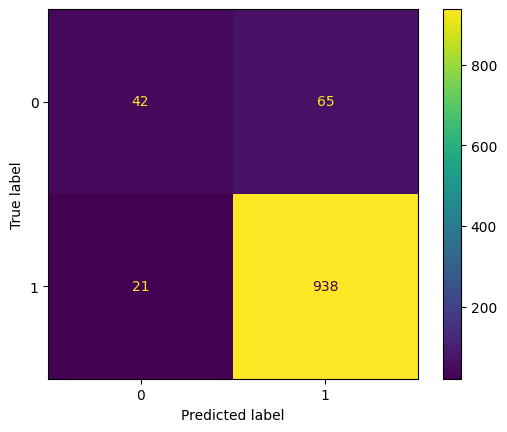

In [ ]:
#printing the confusion metrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)